In [1]:
import os
import pandas as pd
import statsmodels.formula.api as smf
import statsmodels.api as sm
import matplotlib.pyplot as plt
import csv 
import random
import numpy as np

# Part 1. Focus on "type" and "size"

We find size is not significant, and type "TT" looks better(futher investigations needed)

In [2]:
df_test = pd.read_csv('RESULTS_HLJPRMWW_2023-01-20.csv')

In [3]:
df_test.columns = ['length','score','size','type','time']

In [4]:
model = smf.ols('time ~ C(type)*size',data = df_test).fit()
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.852
Method:                 Least Squares   F-statistic:                     955.9
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          1.10e-205
Time:                        18:06:15   Log-Likelihood:                -725.11
No. Observations:                 500   AIC:                             1458.
Df Residuals:                     496   BIC:                             1475.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             20.0658      0.232     86.625      0.000      19.611      20.521
C(type)[T.TT]         -5.4140      0.263    -20.565      0.000      -5.931      -4.897
size                  -0.7125      0.733     -0.973      0.331      -2.152       0.727
C(type)[T.TT]:size     1.1734      0.819      1.433      0.153      -0.436       2.783
==============================================================================
Omnibus:                        0.610   Durbin-Watson:                   1.944
Prob(Omnibus):                  0.737   Jarque-Bera (JB):                0.612
Skew:                           0.084   Prob(JB):                        0.736
Kurtosis:                       2.970   Cond. No.                         30.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
model_2 = smf.ols('time ~ size',data = df_test).fit()
sm.stats.anova_lm(model_2, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,498.0,3609.311218,0.0,NaN,NaN,NaN
1,496.0,532.274457,2.0,3077.036761,1433.66849,6.924699e-207


In [6]:
model_3 = smf.ols('time ~ C(type)',data = df_test).fit()
sm.stats.anova_lm(model_3, model)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,498.0,534.989225,0.0,NaN,NaN,NaN
1,496.0,532.274457,2.0,2.714769,1.264879,0.283182


# 9 on TT

CCD on the whole range, and type is set as "TT"

In [7]:
def convertNtoC(U, UH, UL):
    x = (U - (UH+UL)/2) / ((UH-UL)/2)  
    return x

def convertCtoN(x, UH, UL):
    U = x*(UH-UL)/2 + (UH+UL)/2
    return U

In [8]:
convertNtoC(100, 85, 15)

1.4285714285714286

In [9]:
data = [[45, 85,0.2,'TT'],
[45,15,0.2,'TT'],
[105,15,0.2,'TT'],
[105,85,0.2,'TT'],
[30,50,0.2,'TT'],
[120,50,0.2,'TT'],
[75,0,0.2,'TT'],
[75,100,0.2,'TT'],
[75,50,0.2,'TT']]

In [10]:
df_ccd1 = pd.read_csv('ccd_1.csv')
df_ccd1.columns = ['length','score','size','type','time']
x1 = convertNtoC(df_ccd1['length'], 105, 45)
x2 = convertNtoC(df_ccd1['score'], 85, 15)
df_ccd1['x1'] = x1
df_ccd1['x2'] = x2

In [11]:
model = smf.ols('time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df_ccd1).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.727
Model:                            OLS   Adj. R-squared:                  0.726
Method:                 Least Squares   F-statistic:                     476.6
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          3.03e-249
Time:                        18:06:15   Log-Likelihood:                -1443.5
No. Observations:                 900   AIC:                             2899.
Df Residuals:                     894   BIC:                             2928.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.1297      0.120    134.227      0.000      15.894      16.366
x1             0.6702      0.041     16.186      0.000       0.589       0.751
x2            -1.6215      0.042    -38.187      0.000      -1.705      -1.538
x1:x2          1.2632      0.060     20.928      0.000       1.145       1.382
I(x1 ** 2)     0.5593      0.065      8.662      0.000       0.433       0.686
I(x2 ** 2)     1.0562      0.071     14.922      0.000       0.917       1.195
==============================================================================
Omnibus:                        2.832   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.243   Jarque-Bera (JB):                2.980
Skew:                          -0.046   Prob(JB):                        0.225
Kurtosis:                       3.266   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [12]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Booking rate is maximized when x1=", x_s[0], "and x2=", x_s[1])

Booking rate is maximized when x1= [[-4.5155586]] and x2= [[3.46781671]]


In [13]:
xsN_1 = convertCtoN(x = x_s[0], UH = 105, UL = 45)
xsN_2 = convertCtoN(x = x_s[1], UH = 85, UL = 15)
print("Length=", xsN_1, ", Score=", xsN_2)

Length= [[-60.46675801]] , Score= [[171.37358478]]


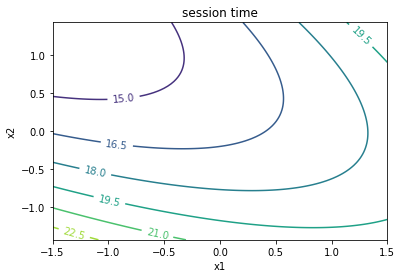

In [14]:
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30, UH = 105, UL = 45), 
                                 convertNtoC(U = 120, UH = 105, UL = 45), 100), 
                     np.linspace(convertNtoC(U = 0, UH = 85, UL = 15), 
                                 convertNtoC(U = 100, UH = 85, UL = 15), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('session time')
plt.show()

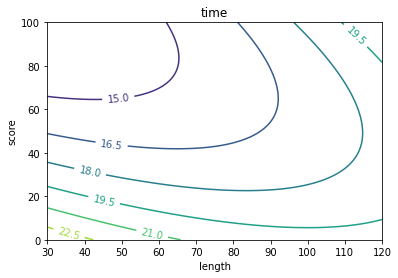

In [15]:
h = plt.contour(convertCtoN(x1, UH=105, UL=45),
                convertCtoN(x2, UH=85, UL=15), eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('length')
plt.ylabel('score')
plt.title('time')
plt.show()

# 9 on AC

"TT" is better than "AC"

In [16]:
df_ccd_ac = pd.read_csv('ccd_ac.csv')
df_ccd_ac.columns = ['length','score','size','type','time']
x1 = convertNtoC(df_ccd_ac['length'], 105, 45)
x2 = convertNtoC(df_ccd_ac['score'], 85, 15)
df_ccd_ac['x1'] = x1
df_ccd_ac['x2'] = x2

In [17]:
df_ccd_ac.groupby(['length','score']).mean('time')

size       time   x1        x2
length score                                
30     50      0.2  21.812744 -1.5  0.000000
45     15      0.2  24.918022 -1.0 -1.000000
       85      0.2  18.267671 -1.0  1.000000
75     0       0.2  25.035974  0.0 -1.428571
       50      0.2  21.228196  0.0  0.000000
       100     0.2  21.709854  0.0  1.428571
105    15      0.2  24.729971  1.0 -1.000000
       85      0.2  22.989265  1.0  1.000000
120    50      0.2  22.457523  1.5  0.000000

In [18]:
model = smf.ols('time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df_ccd_ac).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     489.0
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          7.17e-253
Time:                        18:06:15   Log-Likelihood:                -1429.3
No. Observations:                 900   AIC:                             2871.
Df Residuals:                     894   BIC:                             2899.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     21.2343      0.118    179.515      0.000      21.002      21.466
x1             0.6471      0.041     15.878      0.000       0.567       0.727
x2            -1.6262      0.042    -38.906      0.000      -1.708      -1.544
x1:x2          1.2274      0.059     20.659      0.000       1.111       1.344
I(x1 ** 2)     0.4096      0.064      6.444      0.000       0.285       0.534
I(x2 ** 2)     1.0591      0.070     15.201      0.000       0.922       1.196
==============================================================================
Omnibus:                        0.447   Durbin-Watson:                   1.973
Prob(Omnibus):                  0.800   Jarque-Bera (JB):                0.336
Skew:                          -0.031   Prob(JB):                        0.845
Kurtosis:                       3.071   Cond. No.                         6.14
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Session time is maximized when x1=", x_s[0], "and x2=", x_s[1])

Session time is maximized when x1= [[-14.73207433]] and x2= [[9.30441467]]


In [20]:
xsN_1 = convertCtoN(x = x_s[0], UH = 105, UL = 45)
xsN_2 = convertCtoN(x = x_s[1], UH = 85, UL = 15)
print("Length=", xsN_1, ", Score=", xsN_2)

Length= [[-366.96222995]] , Score= [[375.6545135]]


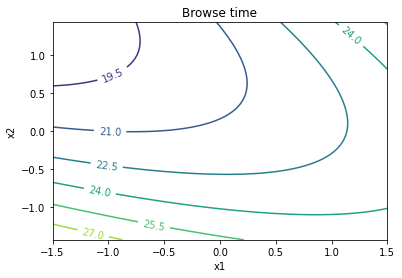

In [21]:
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30, UH = 105, UL = 45), 
                                 convertNtoC(U = 120, UH = 105, UL = 45), 100), 
                     np.linspace(convertNtoC(U = 0, UH = 85, UL = 15), 
                                 convertNtoC(U = 100, UH = 85, UL = 15), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Browse time')
plt.show()

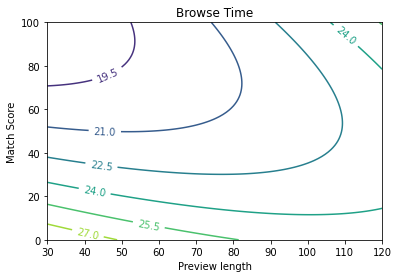

In [22]:
h = plt.contour(convertCtoN(x1, UH=105, UL=45),
                convertCtoN(x2, UH=85, UL=15), eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('Preview length')
plt.ylabel('Match Score')
plt.title('Browse Time')
plt.show()

# 9 on TT(2nd)

This time did 9 on TT in a smaller range


In [23]:
df_ccd2 = pd.read_csv('ccd_2.csv')
df_ccd2.columns = ['length','score','size','type','time']
x1 = convertNtoC(df_ccd2['length'], 75, 55)
x2 = convertNtoC(df_ccd2['score'], 85, 65)
df_ccd2['x1'] = x1
df_ccd2['x2'] = x2


In [24]:
model = smf.ols('time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = df_ccd2).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.614
Model:                            OLS   Adj. R-squared:                  0.611
Method:                 Least Squares   F-statistic:                     283.9
Date:                Fri, 20 Jan 2023   Prob (F-statistic):          8.69e-182
Time:                        18:06:15   Log-Likelihood:                -1285.1
No. Observations:                 900   AIC:                             2582.
Df Residuals:                     894   BIC:                             2611.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.9049      0.101    107.951      0.000      10.707      11.103
x1            -0.8729      0.035    -25.138      0.000      -0.941      -0.805
x2            -0.5877      0.036    -16.338      0.000      -0.658      -0.517
x1:x2          0.7397      0.051     14.615      0.000       0.640       0.839
I(x1 ** 2)     0.1803      0.054      3.345      0.001       0.074       0.286
I(x2 ** 2)     0.9354      0.061     15.260      0.000       0.815       1.056
==============================================================================
Omnibus:                        2.143   Durbin-Watson:                   2.030
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.119
Skew:                          -0.076   Prob(JB):                        0.347
Kurtosis:                       2.817   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Session time is maximized when x1=", x_s[0], "and x2=", x_s[1])

Session time is maximized when x1= [[9.41165126]] and x2= [[-3.40727925]]


In [26]:
xsN_1 = convertCtoN(x = x_s[0], UH = 75, UL = 55)
xsN_2 = convertCtoN(x = x_s[1], UH = 85, UL = 65)
print("Length=", xsN_1, ", Score=", xsN_2)

Length= [[159.11651256]] , Score= [[40.92720746]]


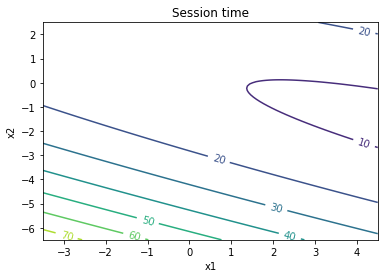

In [27]:
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30, UH = 75, UL = 55), 
                                 convertNtoC(U = 120, UH = 85, UL = 65), 100), 
                     np.linspace(convertNtoC(U = 0, UH = 75, UL = 55), 
                                 convertNtoC(U = 100, UH = 85, UL = 65), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Session time')
plt.show()

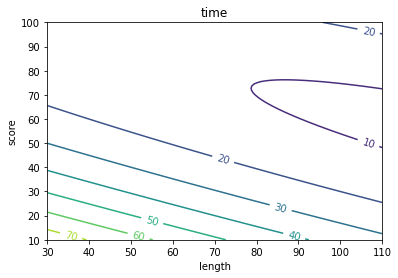

In [28]:
h = plt.contour(convertCtoN(x1, UH=75, UL=55),
                convertCtoN(x2, UH=85, UL=65), eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('length')
plt.ylabel('score')
plt.title('time')
plt.show()

# TT (3)

In [29]:
df_ccd2 = pd.read_csv('ccd_2.csv')
df_ccd2.columns = ['length','score','size','type','time']
extended = df_ccd2.loc[df_ccd2.apply(lambda x: x['length']==65and x['score'] == 75 , axis=1)].copy()

In [30]:
df_ccd3 = pd.read_csv('ccd_3.csv')
df_ccd3.columns = ['length','score','size','type','time']
merged_df = pd.concat([df_ccd3, extended], axis=0, ignore_index=True)
x1 = convertNtoC(merged_df['length'], 85, 65)
x2 = convertNtoC(merged_df['score'], 75, 65)
merged_df['x1'] = x1
merged_df['x2'] = x2

In [31]:
model = smf.ols('time ~ x1 + x2 + x1:x2 + I(x1**2) + I(x2**2)', data = merged_df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   time   R-squared:                       0.357
Model:                            OLS   Adj. R-squared:                  0.354
Method:                 Least Squares   F-statistic:                     99.33
Date:                Fri, 20 Jan 2023   Prob (F-statistic):           2.59e-83
Time:                        18:06:16   Log-Likelihood:                -1255.2
No. Observations:                 900   AIC:                             2522.
Df Residuals:                     894   BIC:                             2551.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     10.3035      0.098    105.445      0.000      10.112      10.495
x1             0.0593      0.034      1.764      0.078      -0.007       0.125
x2            -0.4320      0.035    -12.415      0.000      -0.500      -0.364
x1:x2          0.2501      0.049      5.108      0.000       0.154       0.346
I(x1 ** 2)     0.8561      0.052     16.421      0.000       0.754       0.958
I(x2 ** 2)     0.3340      0.059      5.633      0.000       0.218       0.450
==============================================================================
Omnibus:                        5.998   Durbin-Watson:                   1.889
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                6.627
Skew:                          -0.119   Prob(JB):                       0.0364
Kurtosis:                       3.346   Cond. No.                         6.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [32]:
beta0 = model.params[0]
beta1 = model.params[1]
beta2 = model.params[2]
beta12 = model.params[3]
beta11 = model.params[4]
beta22 = model.params[5]
b = np.matrix([beta1, beta2]).transpose()
B = np.matrix([[beta11, 0.5*beta12], [0.5*beta12, beta22]])
x_s = -0.5* np.matmul(np.linalg.inv(B), b)
print("Session time is maximized when x1=", x_s[0], "and x2=", x_s[1])

Session time is maximized when x1= [[-0.13653313]] and x2= [[0.69780845]]


In [33]:
xsN_1 = convertCtoN(x = x_s[0], UH = 85, UL = 65)
xsN_2 = convertCtoN(x = x_s[1], UH = 75, UL = 65)
print("Length=", xsN_1, ", Score=", xsN_2)

Length= [[73.63466871]] , Score= [[73.48904225]]


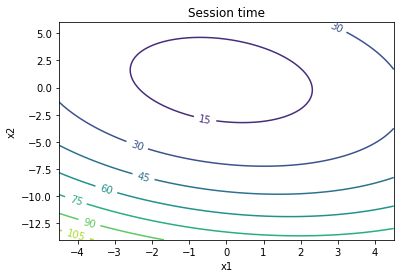

In [34]:
x1, x2 = np.meshgrid(np.linspace(convertNtoC(U = 30, UH = 85, UL = 65), 
                                 convertNtoC(U = 120, UH = 85, UL = 65), 100), 
                     np.linspace(convertNtoC(U = 0, UH = 75, UL = 65), 
                                 convertNtoC(U = 100, UH = 75, UL = 65), 100))
eta = beta0 + beta1*x1 + beta2*x2 + beta12*x1*x2 + beta11*x1**2 + beta22*x2**2
h = plt.contour(x1, x2, eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Session time')
plt.show()

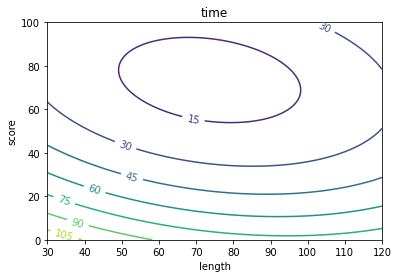

In [35]:
h = plt.contour(convertCtoN(x1, UH=85, UL=65),
                convertCtoN(x2, UH=75, UL=65), eta)
plt.clabel(h, inline=True, fontsize=10)
plt.xlabel('length')
plt.ylabel('score')
plt.title('time')
plt.show()

In [36]:
yhat = model.predict(exog=dict(x1=convertNtoC(U = 75, UH = 85, UL = 65), 
                               x2=convertNtoC(U = 73, UH = 75, UL = 65)))
print(yhat)

0    10.164583
dtype: float64


In [37]:
model.get_prediction(exog=dict(x1=convertNtoC(U = xsN_1, UH = 85, UL = 65), 
                               x2=convertNtoC(U = xsN_2, UH = 75, UL = 65))).summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,10.148768,0.07766,9.99635,10.301186,8.220855,12.076681
